In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:

df_superstore=pd.read_csv("superstore.csv")

## Exploratory Data Analysis

In [31]:
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [32]:
df_superstore.shape

(9800, 18)

In [ ]:
#observations:
#there are a mix of numerical and categorical columns
#colums row ID,orderID,Order Date, Ship Date,Ship Mode,Customer ID,Customer Name,Product ID,Postal Code doesnot provide 
#any insights for our analysis and hence be dropped
#there are 9800 rows and 18 columns 
#label column is sales

In [33]:
df_superstore.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [34]:
df_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [35]:
df_superstore.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [36]:
df_superstore.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
#there are some missing values in postal code
#sales may have outliers

Value counts of category columns

In [37]:
df_superstore.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [38]:
df_superstore.Segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [39]:
df_superstore.Country.value_counts()

United States    9800
Name: Country, dtype: int64

In [40]:
df_superstore.City.value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [17]:
df_superstore.State.value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [41]:
df_superstore.Region.value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [42]:
df_superstore['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [43]:
df_superstore['Product Name'].value_counts()

Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: Product Name, Length: 1849, dtype: int64

# Data Visualisation

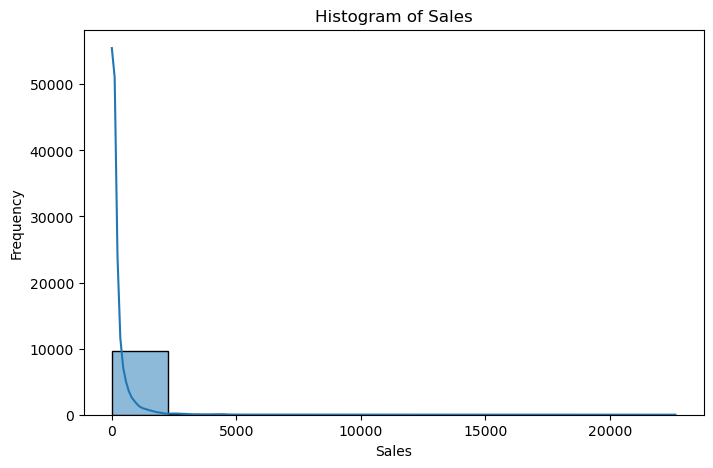

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df_superstore['Sales'],bins=10,kde='True')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

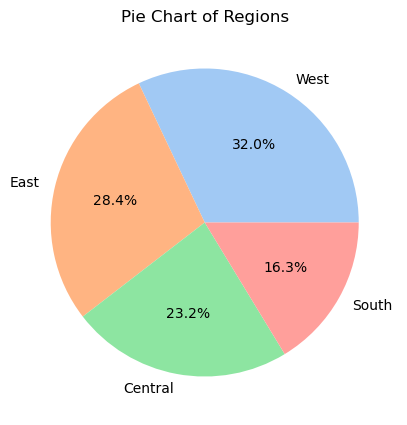

In [48]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df_superstore['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Regions')
plt.ylabel('')
plt.show()

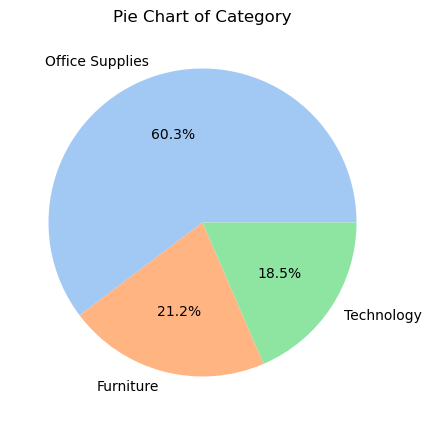

In [49]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df_superstore['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Category')
plt.ylabel('')
plt.show()

In [ ]:
There are columns to be dropped and there are no missing values
Office supplies seems to be the largest category with more than 60% of sales
Sales are divided almost equally within the 4 regions
Category columns have to be one hot encoded
There are outliers to be removed


# Data Preprocessing

In [29]:
df_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
#Remove columns -row ID,orderID,Order Date, Ship Date,Ship Mode,Customer ID,Customer Name,Product ID,Postal Code

In [51]:
df_superstore = df_superstore.drop(columns=['Row ID', 'Order ID','Order Date','Ship Date','Ship Mode','Customer ID','Customer Name','Product ID','Postal Code'])

In [52]:
df_superstore.shape

(9800, 9)

In [65]:
df_num = df_superstore.select_dtypes('number')
df_num.head()

,Sales
0,261.960
2,14.620
4,22.368
5,48.860
6,7.280


In [66]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [67]:
df_superstore = df_superstore[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [68]:
df_superstore.shape

(7875, 9)

In [70]:
y=df_superstore.Sales

In [72]:
X_cat = df_superstore.select_dtypes('object')
X_cat.head()

,Segment,Country,City,State,Region,Category,Sub-Category,Product Name
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
4,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
5,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...
6,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,Newell 322


In [73]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [74]:
X = X_cat_encoded

In [75]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Segment_Consumer                                                                                                    0
Segment_Corporate                                                                                                   0
Segment_Home Office                                                                                                 0
Country_United States                                                                                               0
City_Aberdeen                                                                                                       0
                                                                                                                   ..
Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    0
Product Name_iOttie HLCRIO102 Car Mount                                                                             0
Product Name_iOttie XL Car Mount                        

In [77]:
X.describe()

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,...,Product Name_Zebra GX420t Direct Thermal/Thermal Transfer Printer,Product Name_Zebra Zazzle Fluorescent Highlighters,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service
count,7875.000000,7875.000000,7875.000000,7875.0,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,...,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000
mean,0.523048,0.299810,0.177143,1.0,0.000127,0.000127,0.002286,0.001524,0.001778,0.000508,...,0.000127,0.000762,0.001651,0.000635,0.000635,0.000635,0.000635,0.000254,0.000889,0.000762
std,0.499500,0.458203,0.381814,0.0,0.011269,0.011269,0.047758,0.039009,0.042129,0.022533,...,0.011269,0.027594,0.040599,0.025191,0.025191,0.025191,0.025191,0.015935,0.029803,0.027594
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(6300, 2248)
(1575, 2248)
(6300,)
(1575,)


In [80]:
X.to_csv('superstore_features.csv', index=False)
y.to_csv('superstore_label.csv',index=False)